# 6. Series Temporais

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
dados_completos = pd.read_csv('airline-passengers.csv')

#### Visualizando todo o dataset

In [3]:
dados_completos.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Verificando as características de todo o dataset

In [4]:
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#### Ajustando o dataset para criar uma coluna do tipo "data" 

In [5]:
dados_completos['datetime'] = pd.to_datetime(dados_completos['Month'])

In [6]:
dados_completos.head()

,Month,Passengers,datetime
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


#### Verificando a nova característica do nosso dataset (coluna "datatime")

In [7]:
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    object        
 1   Passengers  144 non-null    int64         
 2   datetime    144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


In [8]:
type(dados_completos)  #verificando o tipo de dados

pandas.core.frame.DataFrame

#### Verificando se existem outliers

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot para o embarque passageiros')

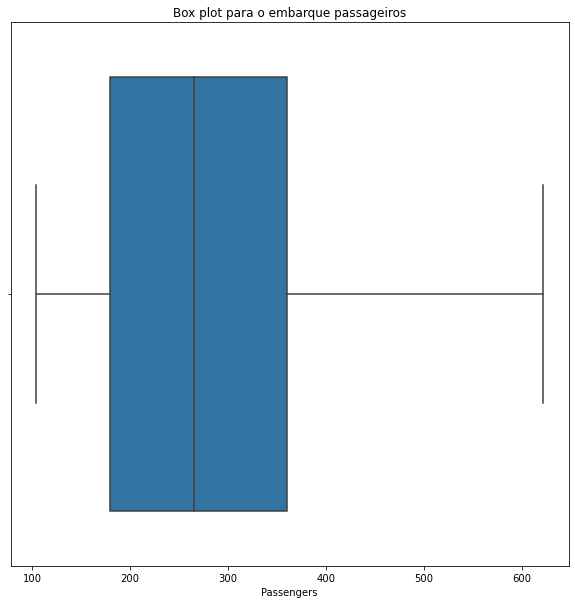

In [9]:
plt.figure(figsize=(10, 10))
g = sns.boxplot(dados_completos['Passengers'])  #realiza o plot através da biblioteca seaborn
g.set_title('Box plot para o embarque passageiros')

#### Plotando o gráfico da variação do número de passageiros no período

Text(0, 0.5, 'Número de passageiros em viagens de avião')

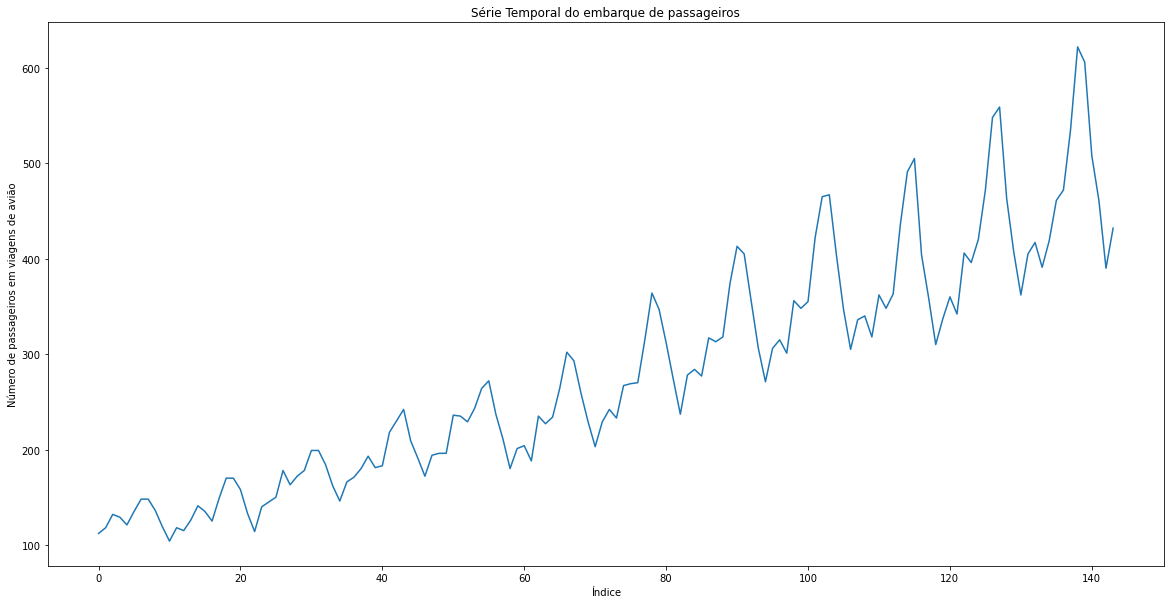

In [10]:
plt.figure(figsize=(20, 10))
g = sns.lineplot(x=dados_completos.index,y=dados_completos['Passengers'])
g.set_title('Série Temporal do embarque de passageiros')
g.set_xlabel('Índice')
g.set_ylabel('Número de passageiros em viagens de avião')

#### Realizando a decomposição da série temporal 

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose  #biblioteca responsável por realizar a decomposição da série temporal

#### Modificando o indice para ser temporal

In [12]:
df_serie_temporal = dados_completos.set_index('datetime')

#### Verifica as colunas existentes

In [13]:
df_serie_temporal.columns

Index(['Month', 'Passengers'], dtype='object')

#### Realiza o drop da coluna 'month'

In [14]:
df_serie_temporal.drop('Month', axis=1, inplace=True)

#### Verifica o novo dataset

In [15]:
df_serie_temporal.head()

,Passengers
datetime,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Realizando a construção do modelo de decomposição da série temporal

In [16]:
decomposicao_aditiva = seasonal_decompose(df_serie_temporal, model='aditive', extrapolate_trend='freq')   #aplica o modelo de decomposição aditiva

#### Realiza o plot da decomposição

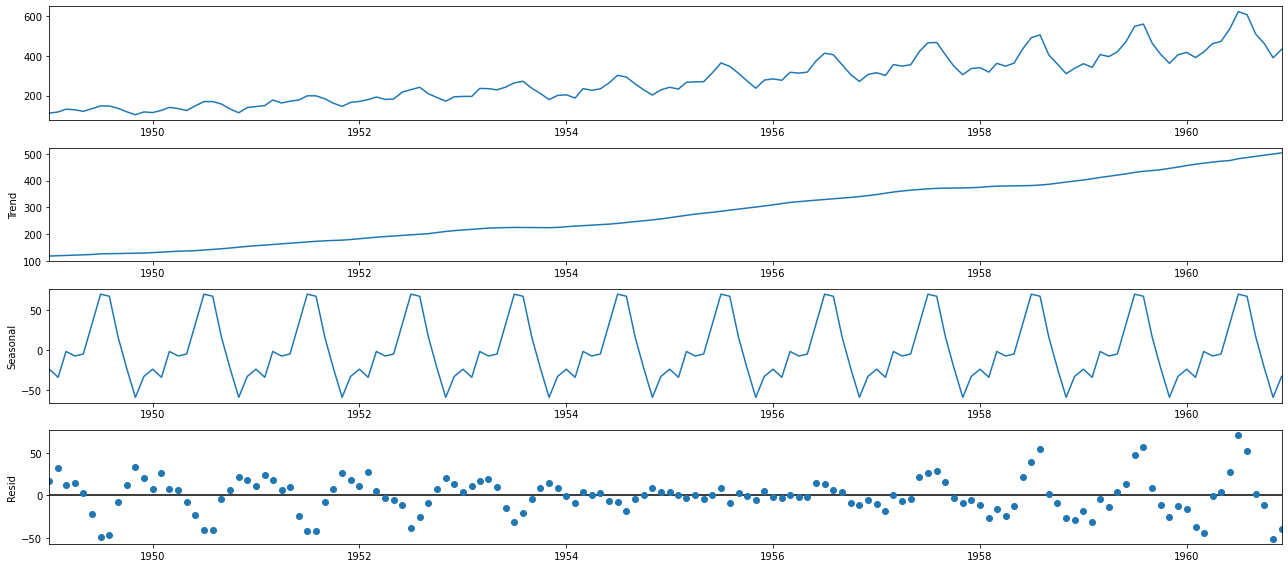

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
fig=decomposicao_aditiva.plot()  #realiza o plot da decomposição
plt.show()

#### Testando a estacionariedade da série temporal

In [18]:
from statsmodels.tsa.stattools import adfuller  #importando o teste ADF 

In [19]:
resultado_ADF = adfuller(df_serie_temporal.Passengers.values, autolag='AIC')  #aplica o teste adf
# para o teste ADF a hipótese nula é que existe, pelo menos, uma raiz negativa na série temporal (série é não-estacionária)

In [20]:
print('ADF P-valor:',resultado_ADF[1] )  # com o p-valor maior que 0,05 a hipótese nula não é rejeitada

ADF P-valor: 0.9918802434376409


#### Retirando a tendência da nossa série

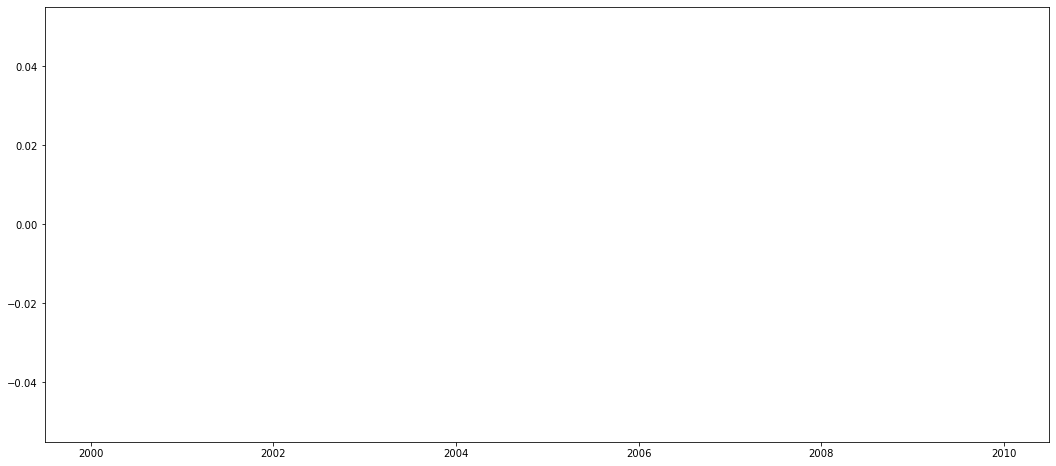

In [21]:
detrended = df_serie_temporal - decomposicao_aditiva.trend
plt.plot(detrended)

#### Retirando a sazomalidade

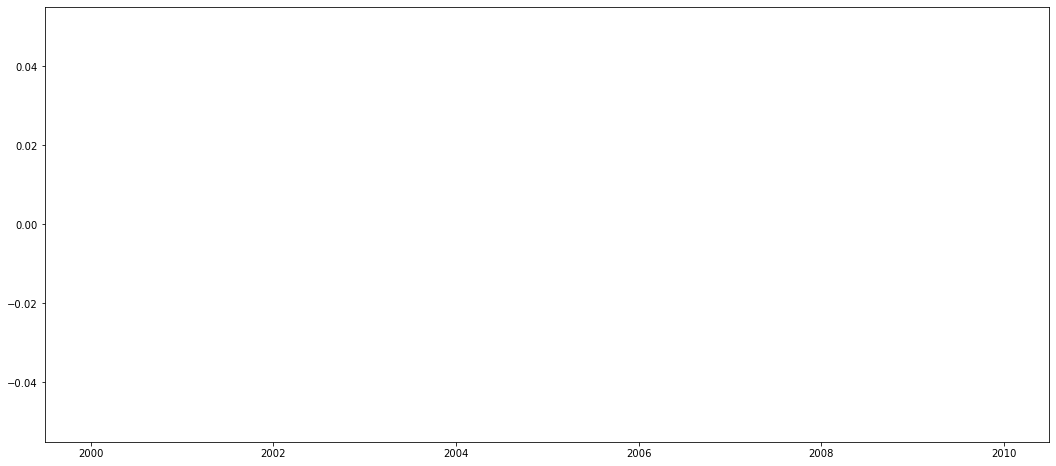

In [22]:
deseasonalized = df_serie_temporal - decomposicao_aditiva.seasonal
plt.plot(deseasonalized)

#### Realizando a análise de autocorrelação nos dados

In [23]:
from statsmodels.graphics.tsaplots import plot_acf   #importando a biblioteca para o plot da autocorrelação

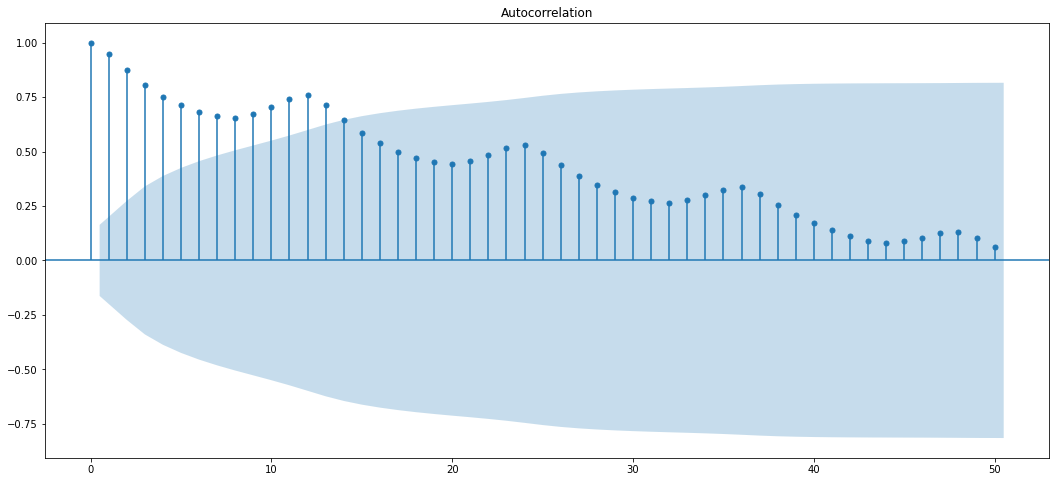

In [24]:
plot_acf(df_serie_temporal, lags=50)  #aplica a autocorrelação entre os dados
plt.show()  #mostra uma correlação significativa com 14 lags

#### Transformando a série em estacionária

<AxesSubplot:xlabel='datetime'>

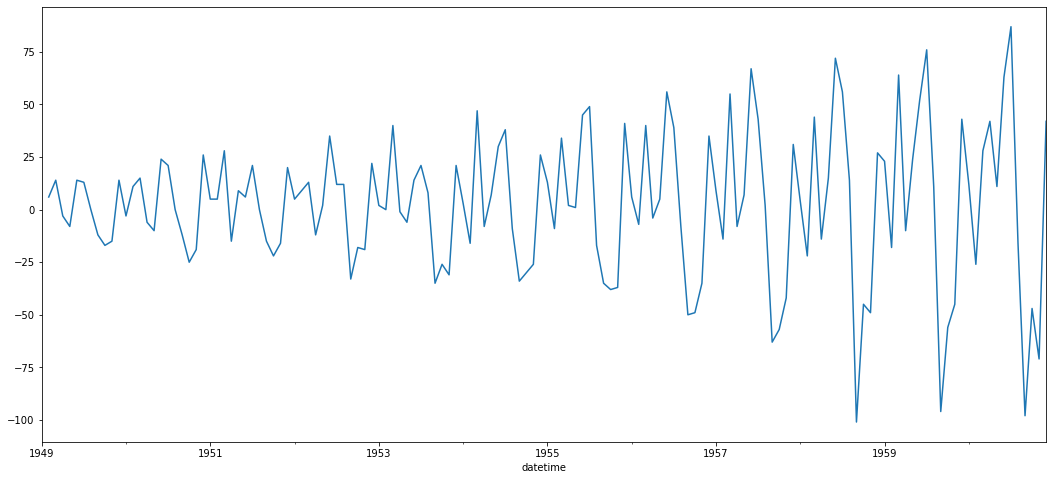

In [25]:
df_serie_temporal['Passengers_diff'] = df_serie_temporal['Passengers'] - df_serie_temporal['Passengers'].shift(1)  #aplica o primeiro "Shift" (derivada para tempo discreto)
df_serie_temporal['Passengers_diff'] = df_serie_temporal['Passengers_diff'].dropna()  #retira os valores nulos
df_serie_temporal['Passengers_diff'].plot()

#### Conferindo se agora está estacionária

In [26]:
X_diff = df_serie_temporal['Passengers_diff'].dropna().values
resultado_primeira_diff = adfuller(X_diff)
print('p-valor: %f' % resultado_primeira_diff[1]) #pvalor, praticamente 0.05, não rejeita a hipótese nula, mas vamos considerar que está estacionária

p-valor: 0.054213


In [28]:
!pip install tensorflow

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=41967b877d3c88dff081a36cb028c9b086761679393ab14deb0f447eaabc3300
  Stored in directory: c:\users\vithep\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=8c6c8cb6875b029e7bf6ac5e555b2790254e8042d7339158b6971c458509ada1
  Stored in directory: c:\users\vithep\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


#### Bibliotecas utilizadas para a construção dos modelos de previsão de vendas de passagens

In [29]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### Volta o dataset para o formato original

In [30]:
serie_passageiros = df_serie_temporal['Passengers'].values

#### Normalizzação do banco de dados, necessário para que os algoritmos possam ter um comportamento mais "previsível"

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1)) #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
dataset = scaler.fit_transform(serie_passageiros.reshape(-1, 1)) # aplica a escala

In [32]:
print(dataset[0:20])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]]


#### Divide o conjunto de dados em treinamento e teste 

In [33]:
train_size = int(len(dataset) * 0.67)  #encontra o valor máximo para o treinamento
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test)) #tamanho do df para treinamento e teste

96 48


#### Cria a matriz necessária para a entrada de dados

In [34]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

### Cria o reshape para que os dados estejam em um formato ideal para entrada

In [35]:
look_back = 14  # será utilizado apenas um passo anterior para a previsão do futuro
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [36]:
trainX.shape

(81, 1, 14)

#### Cria o modelo utilizando redes recorrentes e o LSTM

In [37]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#### Apresenta a arquitetura da rede

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 304       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


#### Realiza o treinamento o modelo de previsão

In [39]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
81/81 - 3s - loss: 0.0218
Epoch 2/100
81/81 - 0s - loss: 0.0044
Epoch 3/100
81/81 - 0s - loss: 0.0034
Epoch 4/100
81/81 - 0s - loss: 0.0032
Epoch 5/100
81/81 - 0s - loss: 0.0029
Epoch 6/100
81/81 - 0s - loss: 0.0028
Epoch 7/100
81/81 - 0s - loss: 0.0026
Epoch 8/100
81/81 - 0s - loss: 0.0025
Epoch 9/100
81/81 - 0s - loss: 0.0024
Epoch 10/100
81/81 - 0s - loss: 0.0022
Epoch 11/100
81/81 - 0s - loss: 0.0022
Epoch 12/100
81/81 - 0s - loss: 0.0021
Epoch 13/100
81/81 - 0s - loss: 0.0020
Epoch 14/100
81/81 - 0s - loss: 0.0019
Epoch 15/100
81/81 - 0s - loss: 0.0018
Epoch 16/100
81/81 - 0s - loss: 0.0017
Epoch 17/100
81/81 - 0s - loss: 0.0017
Epoch 18/100
81/81 - 0s - loss: 0.0016
Epoch 19/100
81/81 - 0s - loss: 0.0016
Epoch 20/100
81/81 - 0s - loss: 0.0014
Epoch 21/100
81/81 - 0s - loss: 0.0014
Epoch 22/100
81/81 - 0s - loss: 0.0013
Epoch 23/100
81/81 - 0s - loss: 0.0013
Epoch 24/100
81/81 - 0s - loss: 0.0012
Epoch 25/100
81/81 - 0s - loss: 0.0012
Epoch 26/100
81/81 - 0s - loss: 0.

#### Realiza as previsões

In [40]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#### Coloca os dados no formato original

In [41]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#### Realiza a mudança dos dados para a previsão

In [42]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#shift para os dados de teste
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

#### Realiza o plot dos dados de previsão e o real

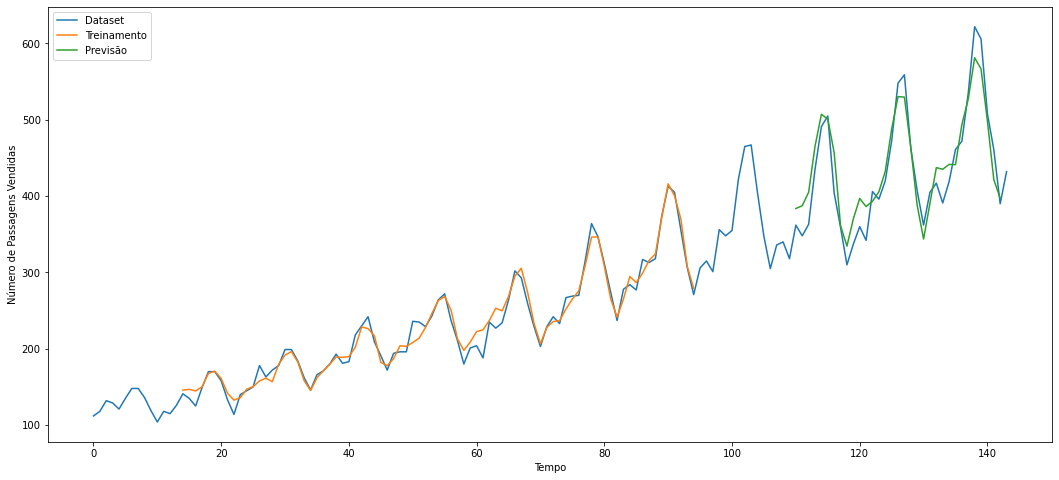

In [43]:
plt.plot(scaler.inverse_transform(dataset),label='Dataset')
plt.plot(trainPredictPlot, label='Treinamento')
plt.plot(testPredictPlot,label='Previsão')
plt.xlabel("Tempo")
plt.ylabel("Número de Passagens Vendidas")
plt.legend()
plt.show()